# XKCD Color Survey Analysis

## Initial Observations from XKCD and browsing in sqlite

1. Way more men responded than women
2. 9942 people out of 152401 respondents spell fuchsia 'fuschia'
3. XKCD fans swear a lot
4. I should have expected sql injections
5. the worst spammer in the database was someone who named 2,400 colors a racial slur

## Questions

1. How many questions did people answer before they got bored?
2. How much time/answers before people started swearing?

## Problems

1. The dataset is 369mb which made most queries too much for sqlite
2. I did a bunch of analysis before I realize the spam wasn't removed

In [3]:
import pandas as pd
import sqlite3
import requests
import seaborn as sns

In [4]:
conn = sqlite3.connect("datasets/data.db")
df = pd.read_sql_query("SELECT * FROM answers;", conn)

In [5]:
try:
    sample = df.sample(100)
except requests.Timeout as err:
    print(err.message)

In [6]:
spammers = pd.read_csv("csv/spammers.csv")
spammers = list(spammers.id)

In [7]:
example_spammer = 134686
example_spammer in spammers # get this chode out of my data

False

In [8]:
spamIndexes = df[ df['user_id'].isin(spammers) ].index
 
# Delete these row indexes from dataFrame
df.drop(spamIndexes , inplace=True)

In [9]:
sample.count()

id           100
user_id      100
datestamp    100
r            100
g            100
b            100
colorname    100
dtype: int64

In [10]:
sample.user_id.nunique()

100

In [11]:
sample2 = pd.read_sql_query("SELECT * FROM answers LIMIT 2000;", conn)

In [78]:
sample2.user_id.nunique()

113

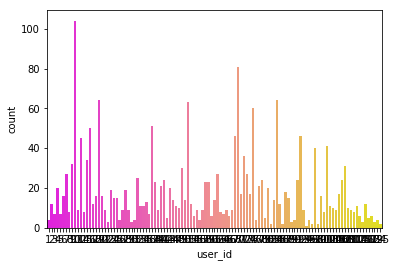

In [12]:
sns.countplot(x="user_id", palette="spring", data=sample2)

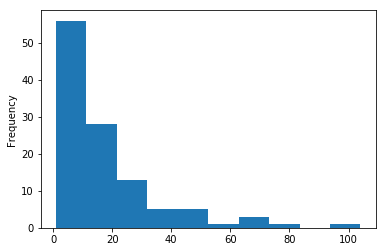

In [80]:
sample2['user_id'].value_counts().plot(kind='hist')

/home/jas/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


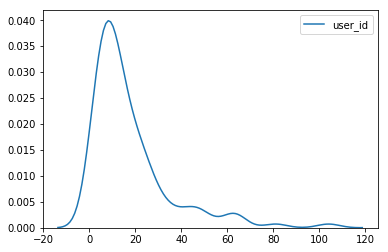

In [81]:
kde = sns.kdeplot(sample2.user_id.value_counts())

In [14]:
sample2.user_id.value_counts().head()

10    104
70     81
19     64
84     64
51     63
Name: user_id, dtype: int64

## Timestamp Stuff

In [17]:
sample.head()

,id,user_id,datestamp,r,g,b,colorname
1134457,1134458,51888,1.267831e+09,224,19,240,magenta
440157,440158,20916,1.267560e+09,98,98,209,blue
1382872,1382873,63350,1.268052e+09,173,142,165,purple
1618351,1618353,73900,1.268232e+09,226,27,200,pinkish
2227065,2227067,100688,1.268802e+09,96,195,95,green


In [18]:
from datetime import datetime
def convert_timestamp(time):
    time = int(time)
    time = datetime.utcfromtimestamp(time).strftime('%Y-%m-%d %H:%M:%S')
    return pd.Timestamp(time)

In [19]:
sample["datestamp"] = sample["datestamp"].apply(convert_timestamp)

In [20]:
sample.head()

,id,user_id,datestamp,r,g,b,colorname
1134457,1134458,51888,2010-03-05 23:17:56,224,19,240,magenta
440157,440158,20916,2010-03-02 19:59:18,98,98,209,blue
1382872,1382873,63350,2010-03-08 12:46:52,173,142,165,purple
1618351,1618353,73900,2010-03-10 14:34:03,226,27,200,pinkish
2227065,2227067,100688,2010-03-17 05:02:40,96,195,95,green


In [21]:
xx_chrom_user_ids = pd.read_csv("csv/xx_chrom_users.csv")
xx_chrom_user_ids.head()

,id
0,4
1,33
2,37
3,41
4,68


In [22]:
xx_chroms = df[df['user_id'].isin(xx_chrom_user_ids['id'])]

In [83]:
xx_chroms.head()

,id,user_id,datestamp,r,g,b,colorname
9,10,4,1.267419e+09,154,42,159,purple
12,13,4,1.267419e+09,116,208,126,green
15,16,4,1.267419e+09,27,34,98,navy blue
20,21,4,1.267419e+09,12,208,219,teal
22,23,4,1.267419e+09,131,79,90,aubergine


In [23]:
xx_chroms.user_id.mode()

0    134686
dtype: int64

In [86]:
# Removing this user. Yikes!
# xx_chroms[xx_chroms["user_id"] == 134686]

In [25]:
xx_chroms["user_id"].value_counts().describe()

count    28178.000000
mean        36.417773
std         32.586220
min          1.000000
25%         19.000000
50%         29.000000
75%         45.000000
max       2345.000000
Name: user_id, dtype: float64